**importing modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.datasets import mnist

**load the dataset**

In [3]:
(x_train, _),(x_test, _)= mnist.load_data()

**normalise the dataset**

In [6]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

**reshape the input data for the model**

In [7]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)
x_test.shape

(10000, 28, 28, 1)

**Add noise to the image**

In [9]:
noise_factor=0.6
x_train_noisy=x_train + noise_factor * np.random.normal(loc=0.0 , scale=1.0 , size=x_train.shape)
noise_factor=0.6
x_test_noisy=x_test + noise_factor * np.random.normal(loc=0.0 , scale=1.0 , size=x_test.shape)

In [ ]:
#clip the values in the range of 0-1

In [13]:
x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)
                      
                      

**Exploratory Data Analysis**

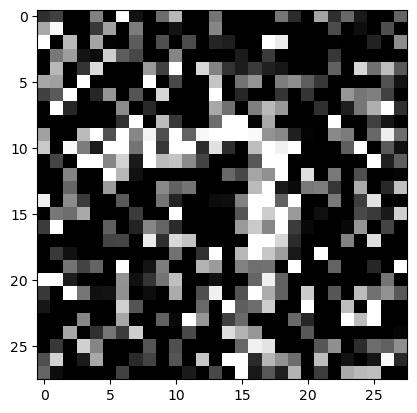

In [16]:
index=np.random.randint(len(x_test))
plt.imshow(x_test_noisy[index].reshape(28,28))    #input noisy image
plt.gray()

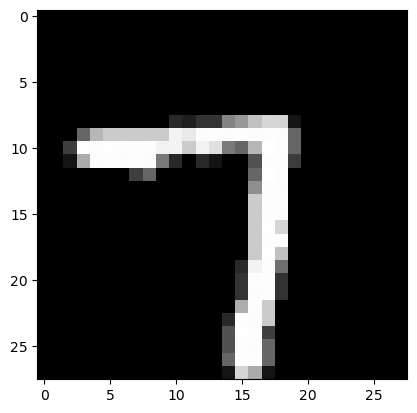

In [17]:
plt.imshow(x_test[index].reshape(28,28))    
plt.gray()

**MODEL CREATION**

In [19]:
model=Sequential([
    # encoder network
    Conv2D(32 ,3 ,activation='relu',padding='same',input_shape=(28,28,1)),
    MaxPooling2D(2,padding='same'),
    Conv2D(16 ,3 ,activation='relu',padding='same'),
    MaxPooling2D(2,padding='same'),
    #decoder network
    Conv2D(16 ,3 ,activation='relu',padding='same'),
    UpSampling2D(2),
    Conv2D(32 ,3 ,activation='relu',padding='same'),
    UpSampling2D(2),
    #output layer
    Conv2D(1 ,3 ,activation='sigmoid',padding='same')
        
])
model.compile(optimizer='adam',loss='binary_crossentropy')
model.summary()

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#training the model 
model.fit(x_train_noisy,x_train,epochs=20,batch_size=256,validation_data=(x_test_noisy,x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - loss: 0.3360 - val_loss: 0.1531
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 0.1497 - val_loss: 0.1386
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - loss: 0.1381 - val_loss: 0.1317
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - loss: 0.1324 - val_loss: 0.1284
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - loss: 0.1289 - val_loss: 0.1260
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - loss: 0.1272 - val_loss: 0.1244
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - loss: 0.1251 - val_loss: 0.1230
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - loss: 0.1240 - val_loss: 0.1220
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.1225 - val_loss: 0.1206
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1220 - val_loss: 0.1195
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 0.1204 - val_loss: 0.1190
Epoch 12/20
235/235 ━━━━━━━━━━

**Visualise the results**

In [23]:
#predict the results from model
pred=model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


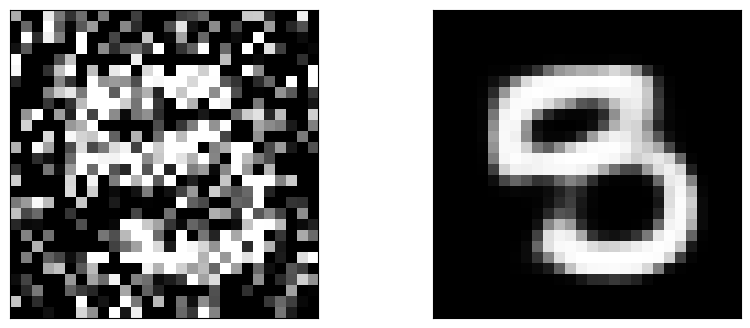

In [25]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()